In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns



In [3]:
data = pd.read_csv("DATA.csv")

In [4]:
data.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,...,Less Delivery time,High Quality of package,Number of calls,Politeness,Freshness,Temperature,Good Taste,Good Quantity,Output,Reviews
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,...,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Yes,Nil\n
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,...,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Yes,Nil
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,...,Important,Very Important,Moderately Important,Very Important,Very Important,Important,Very Important,Moderately Important,Yes,"Many a times payment gateways are an issue, so..."
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,...,Very Important,Important,Moderately Important,Very Important,Very Important,Very Important,Very Important,Important,Yes,nil
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,...,Important,Important,Moderately Important,Important,Important,Important,Very Important,Very Important,Yes,NIL


In [5]:
data.shape

(388, 55)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 55 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Age                                        388 non-null    int64  
 1   Gender                                     388 non-null    object 
 2   Marital Status                             388 non-null    object 
 3   Occupation                                 388 non-null    object 
 4   Monthly Income                             388 non-null    object 
 5   Educational Qualifications                 388 non-null    object 
 6   Family size                                388 non-null    int64  
 7   latitude                                   388 non-null    float64
 8   longitude                                  388 non-null    float64
 9   Pin code                                   388 non-null    int64  
 10  Medium (P1)               

In [7]:
data.describe()

,Age,Family size,latitude,longitude,Pin code
count,388.000000,388.000000,388.000000,388.000000,388.000000
mean,24.628866,3.280928,12.972058,77.600160,560040.113402
std,2.975593,1.351025,0.044489,0.051354,31.399609
min,18.000000,1.000000,12.865200,77.484200,560001.000000
25%,23.000000,2.000000,12.936900,77.565275,560010.750000
50%,24.000000,3.000000,12.977000,77.592100,560033.500000
75%,26.000000,4.000000,12.997025,77.630900,560068.000000
max,33.000000,6.000000,13.102000,77.758200,560109.000000


## Data Cleaning

In [8]:
data.isnull().sum()

Age                                          0
Gender                                       0
Marital Status                               0
Occupation                                   0
Monthly Income                               0
Educational Qualifications                   0
Family size                                  0
latitude                                     0
longitude                                    0
Pin code                                     0
Medium (P1)                                  0
Medium (P2)                                  0
Meal(P1)                                     0
Meal(P2)                                     0
Perference(P1)                               0
Perference(P2)                               0
Ease and convenient                          0
Time saving                                  0
More restaurant choices                      0
Easy Payment option                          0
More Offers and Discount                     0
Good Food qua

In [9]:
data.duplicated().sum()

102

In [10]:
data.drop_duplicates(inplace = True, keep=False)

In [11]:
data.drop(labels = ['Reviews'], axis =1, inplace = True)

In [12]:
data.shape

(222, 54)

In [13]:
data['Output'].value_counts().values

array([171,  51], dtype=int64)

## Exploratory Data Analysis

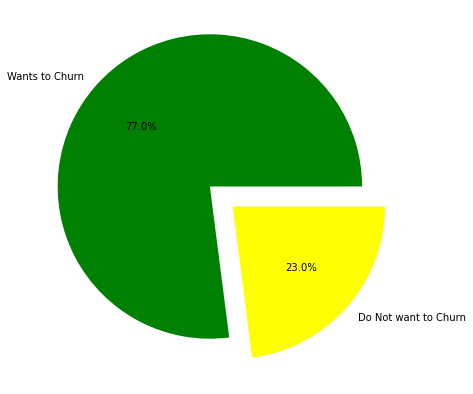

In [14]:
plt.figure(figsize=(11, 7))

labels = ['Wants to Churn', 'Do Not want to Churn']
explode = [.1, .1]
colors = ['green', 'yellow']
sizes = data.Output.value_counts().values
plt.pie(sizes, explode, labels, autopct = "%1.1f%%", colors = colors)
plt.show()

*77% of the customers wants to churn where as 23% don't want to churn.*

<AxesSubplot:xlabel='Age', ylabel='count'>

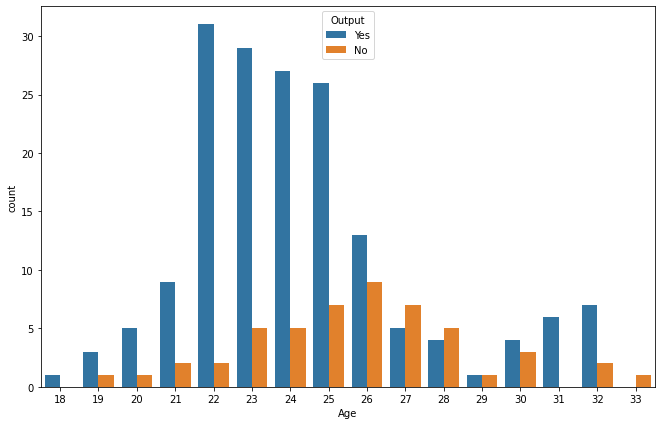

In [15]:
plt.figure(figsize=(11, 7))
sns.countplot(x = "Age", data = data, hue = "Output")

In [16]:
data.columns

Index(['Age', 'Gender', 'Marital Status', 'Occupation', 'Monthly Income',
       'Educational Qualifications', 'Family size', 'latitude', 'longitude',
       'Pin code', 'Medium (P1)', 'Medium (P2)', 'Meal(P1)', 'Meal(P2)',
       'Perference(P1)', 'Perference(P2)', 'Ease and convenient',
       'Time saving', 'More restaurant choices', 'Easy Payment option',
       'More Offers and Discount', 'Good Food quality', 'Good Tracking system',
       'Self Cooking', 'Health Concern', 'Late Delivery', 'Poor Hygiene',
       'Bad past experience', 'Unavailability', 'Unaffordable',
       'Long delivery time', 'Delay of delivery person getting assigned',
       'Delay of delivery person picking up food', 'Wrong order delivered',
       'Missing item', 'Order placed by mistake', 'Influence of time',
       'Order Time', 'Maximum wait time', 'Residence in busy location',
       'Google Maps Accuracy', 'Good Road Condition', 'Low quantity low time',
       'Delivery person ability', 'Influence of 

<AxesSubplot:xlabel='Good Taste ', ylabel='count'>

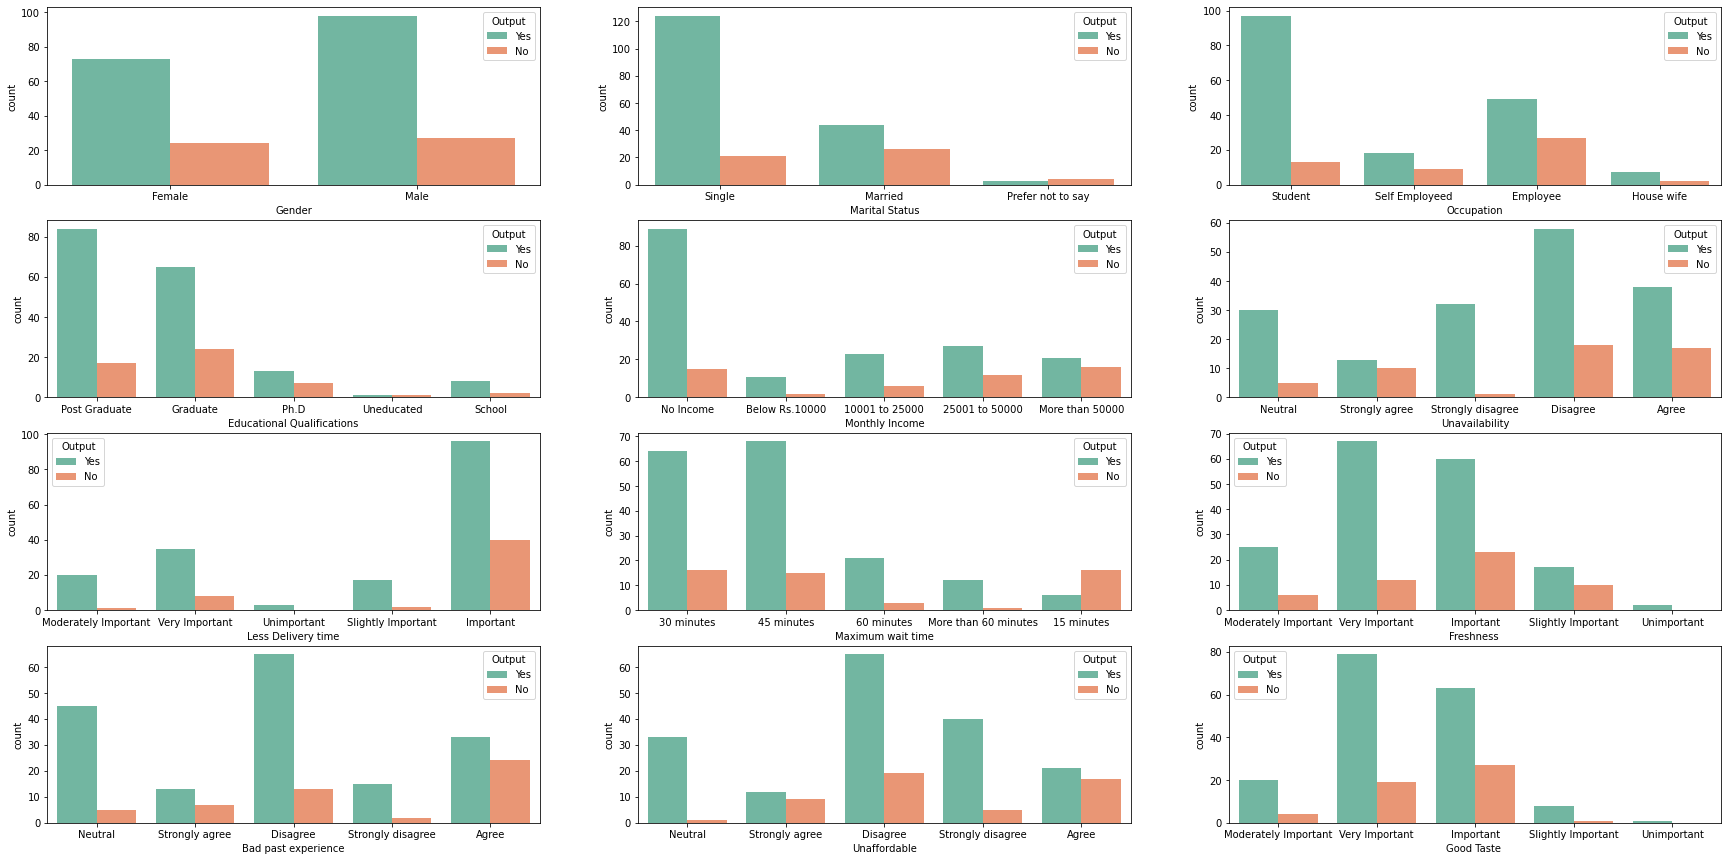

In [17]:
fig, ax = plt.subplots(4, 3, figsize = (30, 15))

sns.countplot(x = "Gender", data = data, hue='Output', palette="Set2", ax=ax[0][0])
sns.countplot(x = "Marital Status", data = data, hue='Output', palette="Set2", ax=ax[0][1])
sns.countplot(x = "Occupation", data = data, hue='Output', palette="Set2", ax=ax[0][2])
sns.countplot(x = "Educational Qualifications", data = data, hue='Output', palette="Set2", ax=ax[1][0])
sns.countplot(x = "Monthly Income", data = data, hue='Output', palette="Set2", ax=ax[1][1])
sns.countplot(x = "Unavailability", data = data, hue='Output', palette="Set2", ax=ax[1][2])
sns.countplot(x = "Less Delivery time", data = data, hue='Output', palette="Set2", ax=ax[2][0])
sns.countplot(x = "Maximum wait time", data = data, hue='Output', palette="Set2", ax=ax[2][1])
sns.countplot(x = "Freshness ", data = data, hue='Output', palette="Set2", ax=ax[2][2])
sns.countplot(x = "Bad past experience", data = data, hue='Output', palette="Set2", ax=ax[3][0])
sns.countplot(x = "Unaffordable", data = data, hue='Output', palette="Set2", ax=ax[3][1])
sns.countplot(x = "Good Taste ", data = data, hue='Output', palette="Set2", ax=ax[3][2])

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

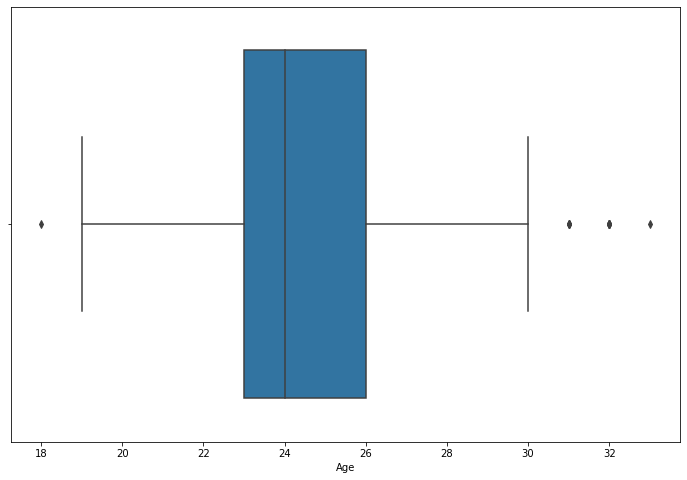

In [18]:
plt.figure(figsize=(12, 8))
sns.boxplot(data['Age'])

In [19]:
Q1 = data.Age.quantile(0.25)
Q3 = data.Age.quantile(0.75)

IQR = Q3 - Q1

data = data[(data.Age >= Q1 - 1.5*IQR) & (data.Age <= Q3 + 1.5*IQR)]

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

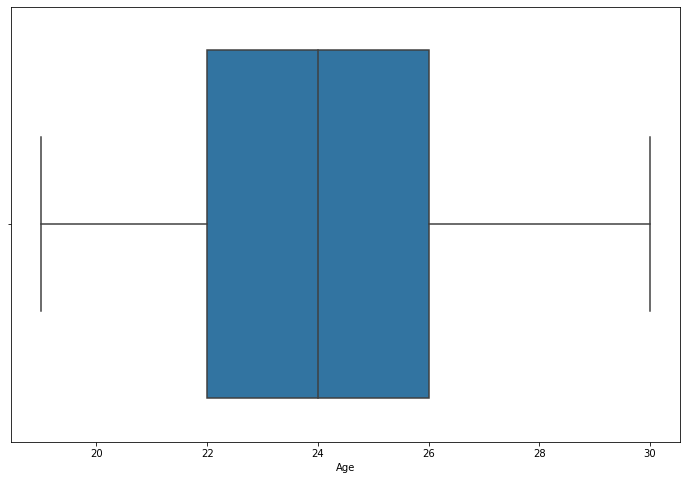

In [20]:
plt.figure(figsize=(12, 8))
sns.boxplot(data['Age'])

In [21]:
plt.figure(figsize=(12, 9))

cor = data.corr()
cor

,Age,Family size,latitude,longitude,Pin code
Age,1.000000,0.165317,0.120750,0.049941,-0.009651
Family size,0.165317,1.000000,-0.025897,0.027551,0.076609
latitude,0.120750,-0.025897,1.000000,-0.157070,-0.323973
longitude,0.049941,0.027551,-0.157070,1.000000,0.136378
Pin code,-0.009651,0.076609,-0.323973,0.136378,1.000000


<Figure size 864x648 with 0 Axes>

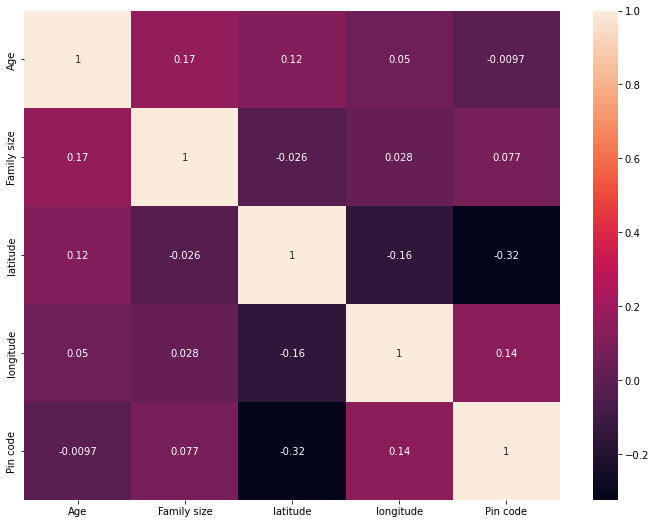

In [22]:
plt.figure(figsize=(12, 9))
sns.heatmap(cor, annot = True)
plt.show()

In [23]:
objList = data.select_dtypes(include = "object").columns

In [24]:
objList

Index(['Gender', 'Marital Status', 'Occupation', 'Monthly Income',
       'Educational Qualifications', 'Medium (P1)', 'Medium (P2)', 'Meal(P1)',
       'Meal(P2)', 'Perference(P1)', 'Perference(P2)', 'Ease and convenient',
       'Time saving', 'More restaurant choices', 'Easy Payment option',
       'More Offers and Discount', 'Good Food quality', 'Good Tracking system',
       'Self Cooking', 'Health Concern', 'Late Delivery', 'Poor Hygiene',
       'Bad past experience', 'Unavailability', 'Unaffordable',
       'Long delivery time', 'Delay of delivery person getting assigned',
       'Delay of delivery person picking up food', 'Wrong order delivered',
       'Missing item', 'Order placed by mistake', 'Influence of time',
       'Order Time', 'Maximum wait time', 'Residence in busy location',
       'Google Maps Accuracy', 'Good Road Condition', 'Low quantity low time',
       'Delivery person ability', 'Influence of rating', 'Less Delivery time',
       'High Quality of package', '

In [25]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [26]:
for i in objList:
  data[i] = le.fit_transform(data[i])

In [27]:
data.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,...,Influence of rating,Less Delivery time,High Quality of package,Number of calls,Politeness,Freshness,Temperature,Good Taste,Good Quantity,Output
0,20,0,2,3,4,2,4,12.9766,77.5993,560001,...,2,1,1,1,1,1,1,1,1,1
1,24,0,2,3,2,0,3,12.9770,77.5773,560009,...,2,4,4,4,4,4,4,4,3,1
14,23,0,2,2,0,2,5,12.9438,77.5738,560004,...,2,1,0,1,0,4,0,4,3,1
15,24,0,2,3,4,2,6,12.8893,77.6399,560068,...,2,1,1,1,0,4,4,4,3,1
16,28,0,2,0,1,2,2,12.9783,77.6408,560038,...,1,3,3,3,2,4,1,0,0,1


In [28]:
from sklearn.feature_selection import chi2

In [29]:
df = data[['Gender', 'Marital Status', 'Occupation', 'Monthly Income',
       'Educational Qualifications', 'Medium (P1)', 'Medium (P2)', 'Meal(P1)',
       'Meal(P2)', 'Perference(P1)', 'Perference(P2)', 'Ease and convenient',
       'Time saving', 'More restaurant choices', 'Easy Payment option',
       'More Offers and Discount', 'Good Food quality', 'Good Tracking system',
       'Self Cooking', 'Health Concern', 'Late Delivery', 'Poor Hygiene',
       'Bad past experience', 'Unavailability', 'Unaffordable',
       'Long delivery time', 'Delay of delivery person getting assigned',
       'Delay of delivery person picking up food', 'Wrong order delivered',
       'Missing item', 'Order placed by mistake', 'Influence of time',
       'Order Time', 'Maximum wait time', 'Residence in busy location',
       'Google Maps Accuracy', 'Good Road Condition', 'Low quantity low time',
       'Delivery person ability', 'Influence of rating', 'Less Delivery time',
       'High Quality of package', 'Number of calls', 'Politeness',
       'Freshness ', 'Temperature', 'Good Taste ', 'Good Quantity', 'Output']]

In [30]:
x = df.drop('Output', axis = 'columns')
y = df['Output']

In [31]:
f_score = chi2(x, y)

In [32]:
p_value = pd.Series(f_score[1], index = x.columns)

p_value = p_value.sort_values(ascending = True)

In [33]:
p_value

Self Cooking                                 0.000003
Occupation                                   0.000175
Less Delivery time                           0.000242
Bad past experience                          0.001322
Marital Status                               0.001658
Maximum wait time                            0.003790
Unaffordable                                 0.011549
Freshness                                    0.012438
Residence in busy location                   0.017244
Health Concern                               0.017833
Unavailability                               0.019101
Good Taste                                   0.027965
Delay of delivery person picking up food     0.057817
Low quantity low time                        0.083590
Number of calls                              0.093741
High Quality of package                      0.117246
Educational Qualifications                   0.128122
Good Tracking system                         0.142516
Late Delivery               

In [34]:
corr_columns = []

significance_level = 0.05

for i in p_value.index:
  if p_value[i] >= significance_level:
    print(i, ' :- Accept Null Hypothesis')
  else:
    print(i, '  :- Reject Null Hypothesis')
    corr_columns.append(i)

Self Cooking   :- Reject Null Hypothesis
Occupation   :- Reject Null Hypothesis
Less Delivery time   :- Reject Null Hypothesis
Bad past experience   :- Reject Null Hypothesis
Marital Status   :- Reject Null Hypothesis
Maximum wait time   :- Reject Null Hypothesis
Unaffordable   :- Reject Null Hypothesis
Freshness    :- Reject Null Hypothesis
Residence in busy location   :- Reject Null Hypothesis
Health Concern   :- Reject Null Hypothesis
Unavailability   :- Reject Null Hypothesis
Good Taste    :- Reject Null Hypothesis
Delay of delivery person picking up food  :- Accept Null Hypothesis
Low quantity low time  :- Accept Null Hypothesis
Number of calls  :- Accept Null Hypothesis
High Quality of package  :- Accept Null Hypothesis
Educational Qualifications  :- Accept Null Hypothesis
Good Tracking system  :- Accept Null Hypothesis
Late Delivery  :- Accept Null Hypothesis
Easy Payment option  :- Accept Null Hypothesis
Temperature  :- Accept Null Hypothesis
Monthly Income  :- Accept Null Hypo

In [35]:
corr_columns

['Self Cooking',
 'Occupation',
 'Less Delivery time',
 'Bad past experience',
 'Marital Status',
 'Maximum wait time',
 'Unaffordable',
 'Freshness ',
 'Residence in busy location',
 'Health Concern',
 'Unavailability',
 'Good Taste ']

In [36]:
len(corr_columns)

12

In [37]:
data.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,...,Influence of rating,Less Delivery time,High Quality of package,Number of calls,Politeness,Freshness,Temperature,Good Taste,Good Quantity,Output
0,20,0,2,3,4,2,4,12.9766,77.5993,560001,...,2,1,1,1,1,1,1,1,1,1
1,24,0,2,3,2,0,3,12.9770,77.5773,560009,...,2,4,4,4,4,4,4,4,3,1
14,23,0,2,2,0,2,5,12.9438,77.5738,560004,...,2,1,0,1,0,4,0,4,3,1
15,24,0,2,3,4,2,6,12.8893,77.6399,560068,...,2,1,1,1,0,4,4,4,3,1
16,28,0,2,0,1,2,2,12.9783,77.6408,560038,...,1,3,3,3,2,4,1,0,0,1


In [38]:
from sklearn.preprocessing import MinMaxScaler

In [39]:
scaler = MinMaxScaler()
data[['latitude', 'longitude', 'Pin code']] = scaler.fit_transform(data[['latitude', 'longitude', 'Pin code']])

In [40]:
data.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,...,Influence of rating,Less Delivery time,High Quality of package,Number of calls,Politeness,Freshness,Temperature,Good Taste,Good Quantity,Output
0,20,0,2,3,4,2,4,0.470439,0.420073,0.000000,...,2,1,1,1,1,1,1,1,1,1
1,24,0,2,3,2,0,3,0.472128,0.339781,0.074074,...,2,4,4,4,4,4,4,4,3,1
14,23,0,2,2,0,2,5,0.331926,0.327007,0.027778,...,2,1,0,1,0,4,0,4,3,1
15,24,0,2,3,4,2,6,0.101774,0.568248,0.620370,...,2,1,1,1,0,4,4,4,3,1
16,28,0,2,0,1,2,2,0.477618,0.571533,0.342593,...,1,3,3,3,2,4,1,0,0,1
